In [1]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter
import geopandas as gpd
from shapely.geometry import shape, box, Polygon
from datetime import date

In [7]:
api = SentinelAPI("sjjohnst", "Atmosphere1806.")

In [2]:
# Define a small geojson polygon for testing downloading data
small_aoi = gpd.read_file('drawn_area.geojson')
small_aoi_wkt = small_aoi.geometry.to_wkt().values[0]
print(small_aoi_wkt)

POLYGON ((-58.227539 -6.620957, -58.227539 -5.57225, -56.689453 -5.57225, -56.689453 -6.620957, -58.227539 -6.620957))


In [37]:
from shapely.wkt import loads
import re
simpledex = re.compile(r"\d*\.\d+")
def mround(match):
    return "{:.0f}".format(float(match.group()))
small_aoi['rounded_geo'] = small_aoi.geometry.apply(lambda x: loads(re.sub(simpledex, mround, x.wkt)))
small_aoi.head()

,geometry,rounded_geo
0,"POLYGON ((-58.22754 -6.62096, -58.22754 -5.572...","POLYGON ((-58.00000 -7.00000, -58.00000 -6.000..."


(-40.0, 10.0)

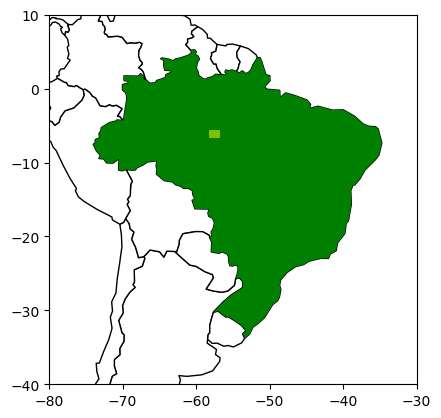

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]

base = world.plot(color='white', edgecolor='black')
brazil.plot(ax=base, color='green')
small_aoi.plot(ax=base, color='yellow', alpha=0.5)

base.set_xlim((-80, -30))
base.set_ylim((-40, 10))

# world.explore()

In [39]:
products = api.query(small_aoi_wkt,
                     producttype='GRD',
                     platformname='Sentinel-1',
                     date=(date(2022, 9, 1), date(2022, 10, 13)))

In [40]:
products_df = api.to_dataframe(products)
print(len(products_df))

14


In [41]:
# Round each footprint's lat/lon to 1 decimal place, and store new geometry in 'rounded_geometry'
products_df['rounded_geometry'] = products_df.footprint.apply(lambda x: re.sub(simpledex, mround, x))
products_df.head(6)

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,gmlfootprint,footprint,uuid,rounded_geometry
645ce0fa-f6ed-4d57-a6dd-680ec9688660,S1A_IW_GRDH_1SDV_20221007T093230_20221007T0932...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-07T09:32:30.931Z, Instrument: SA...",false,2022-10-07 09:32:30.931,2022-10-07 09:32:55.929,2022-10-07 11:49:02.417,355210,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-57.356537 -7.858797, -57.0259...",645ce0fa-f6ed-4d57-a6dd-680ec9688660,"MULTIPOLYGON (((-57 -8, -57 -6, -59 -6, -60 -7..."
f232cdca-24cd-459f-9e77-ab196dd1f33f,S1A_IW_GRDH_1SDV_20221007T093205_20221007T0932...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-07T09:32:05.931Z, Instrument: SA...",false,2022-10-07 09:32:05.931,2022-10-07 09:32:30.930,2022-10-07 11:49:01.380,355210,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-57.025974 -6.348403, -56.6994...",f232cdca-24cd-459f-9e77-ab196dd1f33f,"MULTIPOLYGON (((-57 -6, -57 -5, -59 -4, -59 -6..."
0f0a7c4c-8179-49b1-a95b-d7d455f8f326,S1A_IW_GRDH_1SDV_20221002T092422_20221002T0924...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-02T09:24:22.109Z, Instrument: SA...",false,2022-10-02 09:24:22.109,2022-10-02 09:24:47.108,2022-10-02 11:37:13.130,354577,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-55.3685 -8.146725, -55.034584...",0f0a7c4c-8179-49b1-a95b-d7d455f8f326,"MULTIPOLYGON (((-55 -8, -55 -7, -57 -6, -58 -8..."
d2803b13-42bf-4f05-ac8e-ffe485efd5ae,S1A_IW_GRDH_1SDV_20221002T092357_20221002T0924...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-02T09:23:57.109Z, Instrument: SA...",false,2022-10-02 09:23:57.109,2022-10-02 09:24:22.108,2022-10-02 11:37:12.682,354577,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-55.034561 -6.636988, -54.7074...",d2803b13-42bf-4f05-ac8e-ffe485efd5ae,"MULTIPOLYGON (((-55 -7, -55 -5, -57 -5, -57 -6..."
96d86863-53da-4243-8ade-329c6c4aebef,S1A_IW_GRDH_1SDV_20220925T093205_20220925T0932...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-09-25T09:32:05.5Z, Instrument: SAR-...",false,2022-09-25 09:32:05.500,2022-09-25 09:32:30.497,2022-09-25 11:45:15.273,353713,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-57.024841 -6.348368, -56.6983...",96d86863-53da-4243-8ade-329c6c4aebef,"MULTIPOLYGON (((-57 -6, -57 -5, -59 -4, -59 -6..."
7704f2ac-d8eb-46b1-a4a1-6f864c9689cd,S1A_IW_GRDH_1SDV_20220925T093230_20220925T0932...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-09-25T09:32:30.499Z, Instrument: SA...",false,2022-09-25 09:32:30.499,2022-09-25 09:32:55.498,2022-09-25 11:45:03.120,353713,...,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-57.35540

In [42]:
# Sort the dataframe based on date, in descending order
products_df_sorted = products_df.sort_values('ingestiondate', ascending=False)

# Now drop all rows with duplicate geometries, keep the first one found, which will be most recent (due to sorting)
recent_products_df = products_df_sorted.drop_duplicates(subset=['rounded_geometry'], keep='first')

In [45]:
recent_products_df['ingestiondate','rounded_geometry'].head()

KeyError: ('ingestiondate', 'rounded_geometry')

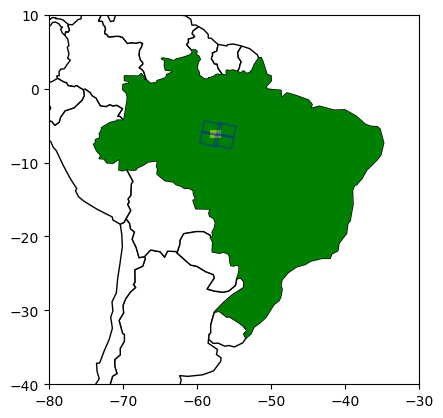

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]
# brazil = gpd.read_file('gadm41_BRA_shp/gadm41_BRA_0.shp')

base = world.plot(color='white', edgecolor='black')
brazil.plot(ax=base, color='green')
small_aoi.plot(ax=base, color='yellow', alpha=0.5)

base.set_xlim((-80, -30))
base.set_ylim((-40, 10))

footprints = recent_products_df.footprint
# base.set_xlim((-80, -30))
# base.set_ylim((-40, 10))
for f in footprints:
    gpd_series = gpd.GeoSeries.from_wkt([f])
    gpd_series.boundary.plot(ax=base, color='blue', alpha=0.3)


In [12]:
from sentinelsat import make_path_filter
path_filter = make_path_filter("*measurement/*", exclude=True)

api.download(products['87d5bce3-6f9e-429e-92ea-0f6b72ef3219'], nodefilter=path_filter)

ServerError: HTTP status 404: UriNotMatchingException : Could not match segment: 'Products('%7B'title':%20'S1A_IW_GRDH_1SDV_20221012T094001_20221012T094026_045407_056E01_71D4',%20'link':%20%22https:'.